<a href="https://colab.research.google.com/github/Sachini-Dissanayaka/DrivenData_PumpItUp/blob/master/ML_PumpItUp_Initial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Getting Started**

In [ ]:
!pip install dalex

In [ ]:
!pip install shap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/PumpIt

In [ ]:
!pip install catboost
!pip install category_encoders

In [84]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn import preprocessing
import datetime as dt
from numpy import mean
from numpy import std
import shap

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import KNNImputer

# feature selection
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

# encoders
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from category_encoders import TargetEncoder

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# classifiers
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier, VotingClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

#**EDA**

#**Data Collection**

In [7]:
features_df = pd.read_csv(
    "TrainingSetValues.csv", 
    index_col="id",
    low_memory=False
)
labels_df = pd.read_csv(
    "TrainingSetLabels.csv", 
    index_col="id"
)
test_df = pd.read_csv(
    "TestSetValues.csv", 
    index_col="id",
    low_memory=False
)

In [8]:
features_df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [9]:
X = features_df.copy()
y = labels_df.copy()
X_test = test_df.copy()

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

In [11]:
# Combine train data with test data
df=X.append(X_test)

In [12]:
df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,74250.000000,74250.000000,74250.000000,7.425000e+04,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000
mean,318.685704,665.667313,34.074262,-5.701771e+00,0.462330,15.265414,5.629077,180.750828,1298.463650
std,2906.762364,692.761033,6.572519,2.944969e+00,11.537879,17.508907,9.641636,471.086120,952.349375
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.086819,-8.525675e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,364.000000,34.907475,-5.026540e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1317.000000,37.181685,-3.325058e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2777.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [13]:
y.head()

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


#**Data Cleaning**

In [ ]:
X.isnull().sum()

In [ ]:
X_test.isnull().sum()

In [16]:
X_null = X.isnull().sum()
test_null = X_test.isnull().sum()

In [17]:
list_features = X_test.columns
print('Number of features : ',len(list_features))
print('')
i = 0
for f in list_features:
    print('feature:', f, '|| Type:', type(X[f][0]), '|| Example:', X[f][0], '|| number of unique values', len(X[f].unique()), '|| missing values training : ', (X_null.values[i]/X.shape[0])*100, '|| missing values test : ', (test_null.values[i]/X_test.shape[0])*100 )
    i +=1

Number of features :  39

feature: amount_tsh || Type: <class 'numpy.float64'> || Example: 0.0 || number of unique values 98 || missing values training :  0.0 || missing values test :  0.0
feature: date_recorded || Type: <class 'str'> || Example: 2012-11-13 || number of unique values 356 || missing values training :  0.0 || missing values test :  0.0
feature: funder || Type: <class 'str'> || Example: Tasaf || number of unique values 1898 || missing values training :  6.11952861952862 || missing values test :  5.851851851851852
feature: gps_height || Type: <class 'numpy.int64'> || Example: 0 || number of unique values 2428 || missing values training :  0.0 || missing values test :  0.0
feature: installer || Type: <class 'str'> || Example: TASAF || number of unique values 2146 || missing values training :  6.153198653198653 || missing values test :  5.905723905723906
feature: longitude || Type: <class 'numpy.float64'> || Example: 33.1258283 || number of unique values 57516 || missing val

In [18]:
#finding Zero Percentage in each column
all = X.shape[0]
X_zero = X.astype(bool).sum(axis=0)
list_X = X_test.columns
print('Number of features : ',len(list_X))
print('')
i = 0
for f in list_X:
  if (((all - X_zero.values[i])/all)*100 > 0):
    print('feature:', f, '|| Type:', type(X[f][0]),'|| Example:', X[f][0], '|| zero percentage', ((all - X_zero.values[i])/all)*100 )
  i += 1

Number of features :  39

feature: amount_tsh || Type: <class 'numpy.float64'> || Example: 0.0 || zero percentage 70.09932659932659
feature: gps_height || Type: <class 'numpy.int64'> || Example: 0 || zero percentage 34.40740740740741
feature: longitude || Type: <class 'numpy.float64'> || Example: 33.1258283 || zero percentage 3.05050505050505
feature: num_private || Type: <class 'numpy.int64'> || Example: 0 || zero percentage 98.72558922558923
feature: district_code || Type: <class 'numpy.int64'> || Example: 3 || zero percentage 0.038720538720538725
feature: population || Type: <class 'numpy.int64'> || Example: 0 || zero percentage 35.994949494949495
feature: public_meeting || Type: <class 'float'> || Example: nan || zero percentage 8.51010101010101
feature: permit || Type: <class 'bool'> || Example: True || zero percentage 29.44781144781145
feature: construction_year || Type: <class 'numpy.int64'> || Example: 0 || zero percentage 34.86363636363636


In [19]:
#remove columns with zeros and more missing values along with more unique values
df.drop(columns=['num_private', 'scheme_name'], axis=1, inplace=True)

In [20]:
#drop unwanted columns
df.drop(columns=['recorded_by','wpt_name'], axis=1, inplace=True)

**Handling Missing Values**

In [21]:
# Number of missing values in each column
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

funder               4504
installer            4532
subvillage            470
public_meeting       4155
scheme_management    4846
permit               3793
dtype: int64


*   num_private - droped - only one unique value
*   wpt_name - droped - number of unique values 37400
*   num_private, scheme_name - droped
*   Population - need to search more 36% zero count - relaced zeros with nan and mean
*   funder - mode
*   installer - mode
*   subvilage - mode
*   public_meeting - mode
*   scheme_management - mode
*   permit - mode
*   construction year - replace zeros with nan and use mode









In [22]:
mis_columns = ['construction_year','population']
for col in mis_columns:
  df[col].replace(0, np.nan, inplace=True)

In [23]:
all = df.shape[0]
X_zero = df.astype(bool).sum(axis=0)
list_X = df.columns
print('Number of features : ',len(list_X))
print('')
i = 0
for f in list_X:
  if (((all - X_zero.values[i])/all)*100 > 0):
    print('feature:', f, '|| Type:', type(df[f][0]),'|| Example:', df[f][0], '|| zero percentage', ((all - X_zero.values[i])/all)*100 )
  i += 1

Number of features :  35

feature: amount_tsh || Type: <class 'numpy.float64'> || Example: 0.0 || zero percentage 70.09966329966329
feature: gps_height || Type: <class 'numpy.int64'> || Example: 0 || zero percentage 34.54410774410774
feature: longitude || Type: <class 'numpy.float64'> || Example: 33.1258283 || zero percentage 3.055892255892256
feature: district_code || Type: <class 'numpy.int64'> || Example: 3 || zero percentage 0.03636363636363636
feature: public_meeting || Type: <class 'float'> || Example: nan || zero percentage 8.546801346801347
feature: permit || Type: <class 'bool'> || Example: True || zero percentage 29.428956228956228


In [24]:
# Fill missing values with mode
def fill_mode(all_column,X):
  for X_column in all_column:
    X[X_column] = X[X_column].fillna(X[X_column].mode()[0])
  return X

In [25]:
df = fill_mode(["funder","installer","subvillage","public_meeting","scheme_management","permit","construction_year"],df)

In [26]:
# Fill missing values with mean
def fill_mean(all_column,X):
  for X_column in all_column:
    X[X_column] = X[X_column].fillna(round(X[X_column].mean()))
  return X

In [27]:
df = fill_mean(["population"],df)

In [28]:
# Number of missing values in each column
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


*   *No missing values*

#**Data Visualization**

In [29]:
# Combined training dataset with labels
combined = df.copy()
combined['status_group'] = y['status_group']

In [30]:
combined.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109.0,True,VWC,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280.0,True,Other,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250.0,True,VWC,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58.0,True,VWC,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,283.0,True,VWC,True,2010.0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


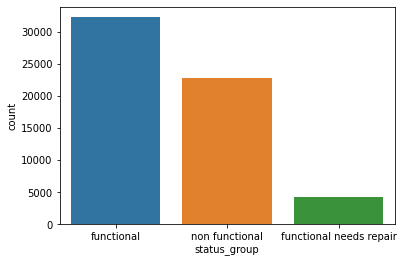

In [31]:
#Target - status_group
sns.countplot(x="status_group", data=combined)

In [32]:
combined['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair', nan],
      dtype=object)

Amount_tsh

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


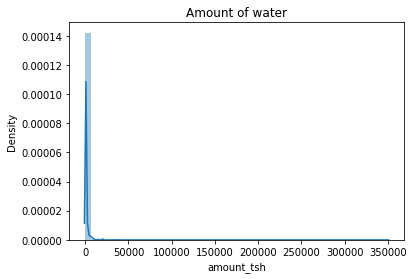

In [33]:
fig = sns.distplot(df['amount_tsh'])
plt.title('Amount of water')
plt.show(fig)
#have to smooth the data
#get log

In [34]:
df['amt'] = np.log(df['amount_tsh']+1)

In [35]:
df['amt_q3'] = 0

In [36]:
df.loc[(df['amt'] > 3.044), 'amt_q3'] = 1

In [37]:
df.loc[:, 'amt_q3'].value_counts()

0    53880
1    20370
Name: amt_q3, dtype: int64

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


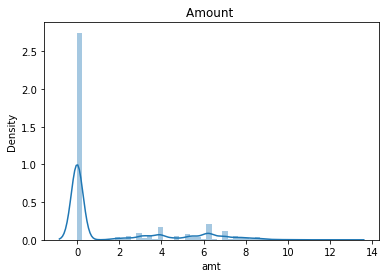

In [38]:
fig = sns.distplot(df['amt'])
plt.title('Amount ')
plt.show(fig)

In [39]:
df.drop(columns=['amount_tsh','amt_q3'], axis=1, inplace=True)

In [40]:
df['amt'].describe()

count    74250.000000
mean         1.586515
std          2.638600
min          0.000000
25%          0.000000
50%          0.000000
75%          3.044522
max         12.765691
Name: amt, dtype: float64

In [41]:
# Combined training dataset with labels
combined = df.copy()
combined['status_group'] = y['status_group']

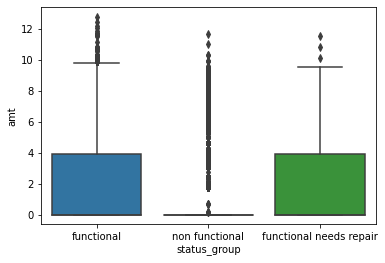

In [42]:
sns.boxplot(x="status_group", y="amt",data= combined)

Extraction

In [43]:
df_ex = df.loc[:, ['extraction_type', 'extraction_type_group','extraction_type_class']]

In [44]:
df_ex.value_counts()

extraction_type            extraction_type_group  extraction_type_class
gravity                    gravity                gravity                  33263
nira/tanira                nira/tanira            handpump                 10205
other                      other                  other                     8102
submersible                submersible            submersible               5982
swn 80                     swn 80                 handpump                  4588
mono                       mono                   motorpump                 3628
india mark ii              india mark ii          handpump                  3029
afridev                    afridev                handpump                  2208
ksb                        submersible            submersible               1790
other - rope pump          rope pump              rope pump                  572
other - swn 81             other handpump         handpump                   284
windmill                   wind-power

In [45]:
df['extraction_type_class'].value_counts()

gravity         33263
handpump        20612
other            8102
submersible      7772
motorpump        3777
rope pump         572
wind-powered      152
Name: extraction_type_class, dtype: int64

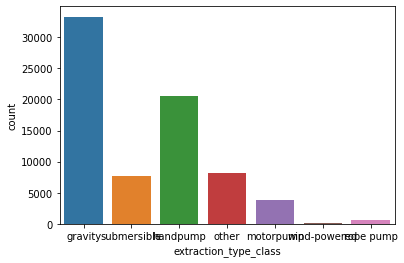

In [46]:
sns.countplot(x="extraction_type_class", data=combined)

Management Feature

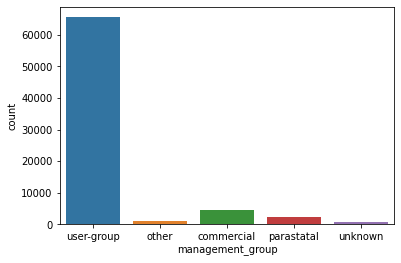

In [47]:
sns.countplot(x="management_group", data=combined)

In [48]:
df["management_group"].value_counts()

user-group    65538
commercial     4591
parastatal     2229
other          1209
unknown         683
Name: management_group, dtype: int64

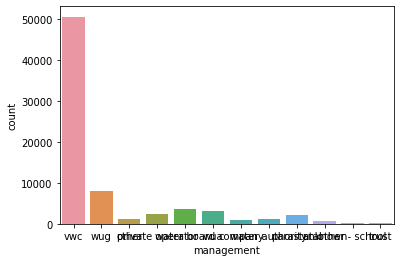

In [49]:
sns.countplot(x="management", data=combined)

In [50]:
df["management"].value_counts()

vwc                 50624
wug                  8108
water board          3688
wua                  3118
private operator     2504
parastatal           2229
water authority      1123
other                1083
company               859
unknown               683
other - school        126
trust                 105
Name: management, dtype: int64

In [51]:
df_man = df.loc[:, ['management_group', 'management']]

In [52]:
df_man.value_counts()

management_group  management      
user-group        vwc                 50624
                  wug                  8108
                  water board          3688
                  wua                  3118
commercial        private operator     2504
parastatal        parastatal           2229
commercial        water authority      1123
other             other                1083
commercial        company               859
unknown           unknown               683
other             other - school        126
commercial        trust                 105
dtype: int64

Payment Feature

In [53]:
df_pay = df.loc[:, ['payment', 'payment_type']]

In [54]:
df_pay.value_counts()

payment                payment_type
never pay              never pay       31712
pay per bucket         per bucket      11266
pay monthly            monthly         10397
unknown                unknown         10149
pay when scheme fails  on failure       4842
pay annually           annually         4570
other                  other            1314
dtype: int64

In [55]:
df["payment"].value_counts()

never pay                31712
pay per bucket           11266
pay monthly              10397
unknown                  10149
pay when scheme fails     4842
pay annually              4570
other                     1314
Name: payment, dtype: int64

In [56]:
df["payment_type"].value_counts()

never pay     31712
per bucket    11266
monthly       10397
unknown       10149
on failure     4842
annually       4570
other          1314
Name: payment_type, dtype: int64

Quality

In [57]:
df_quality = df.loc[:, ['water_quality', 'quality_group']]

In [58]:
df_quality.value_counts()

water_quality       quality_group
soft                good             63505
salty               salty             6082
unknown             unknown           2345
milky               milky             1005
coloured            colored            623
salty abandoned     salty              423
fluoride            fluoride           244
fluoride abandoned  fluoride            23
dtype: int64

Quantity

In [59]:
df_quantity = df.loc[:, ['quantity', 'quantity_group']]

In [60]:
df_quantity.value_counts()

quantity      quantity_group
enough        enough            41522
insufficient  insufficient      18896
dry           dry                7782
seasonal      seasonal           5075
unknown       unknown             975
dtype: int64

Source

In [61]:
df_source = df.loc[:, ['source', 'source_type']]

In [62]:
df_source.value_counts()

source                source_type         
spring                spring                  21216
shallow well          shallow well            21140
machine dbh           borehole                13822
river                 river/lake              11964
rainwater harvesting  rainwater harvesting     2863
hand dtw              borehole                 1108
lake                  river/lake                950
dam                   dam                       840
other                 other                     261
unknown               other                      86
dtype: int64

Water Point

In [63]:
df_water = df.loc[:, ['waterpoint_type', 'waterpoint_type_group']]

In [64]:
df_water.value_counts()

waterpoint_type              waterpoint_type_group
communal standpipe           communal standpipe       35628
hand pump                    hand pump                21884
other                        other                     8010
communal standpipe multiple  communal standpipe        7611
improved spring              improved spring            959
cattle trough                cattle trough              150
dam                          dam                          8
dtype: int64

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


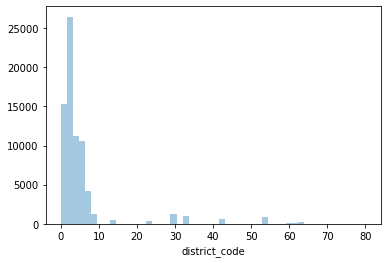

In [65]:
sns.distplot( combined['district_code'], kde=False)

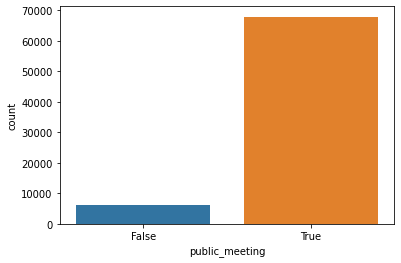

In [66]:
#Public meeting
sns.countplot(x="public_meeting", data=df)

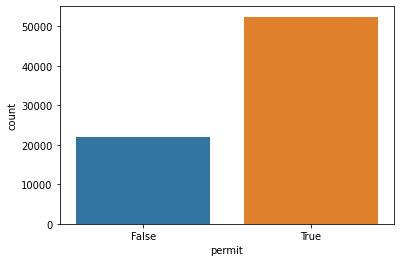

In [67]:
#Permit
sns.countplot(x="permit", data=combined)

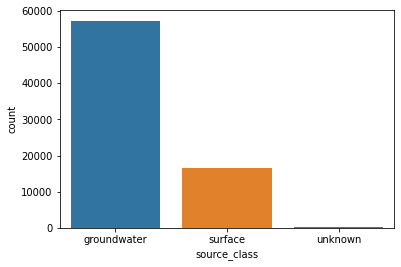

In [68]:
#sorce_class
sns.countplot(x="source_class", data=combined)

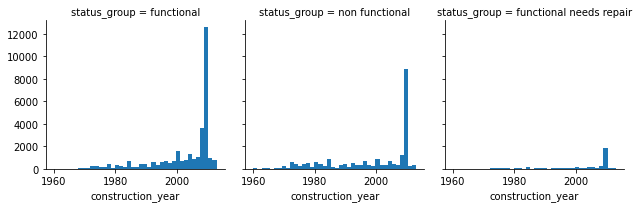

In [69]:
com  = df.copy()
com['status_group'] = y['status_group']
num = sns.FacetGrid(com, col='status_group')
print(num.map(plt.hist, 'construction_year', bins=40))

population

In [70]:
df['population'].describe()

count    74250.000000
mean       283.027219
std        451.034985
min          1.000000
25%        100.000000
50%        283.000000
75%        283.000000
max      30500.000000
Name: population, dtype: float64

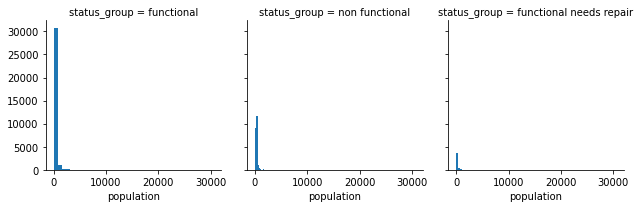

In [71]:
com  = df.copy()
com['status_group'] = y['status_group']
num = sns.FacetGrid(com, col='status_group')
print(num.map(plt.hist, 'population', bins=40))

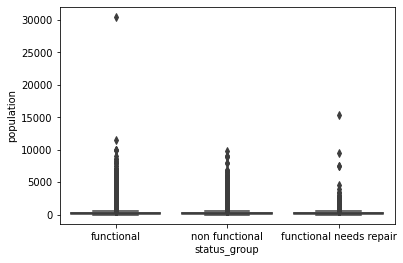

In [72]:
sns.boxplot(x="status_group", y="population",data= combined)

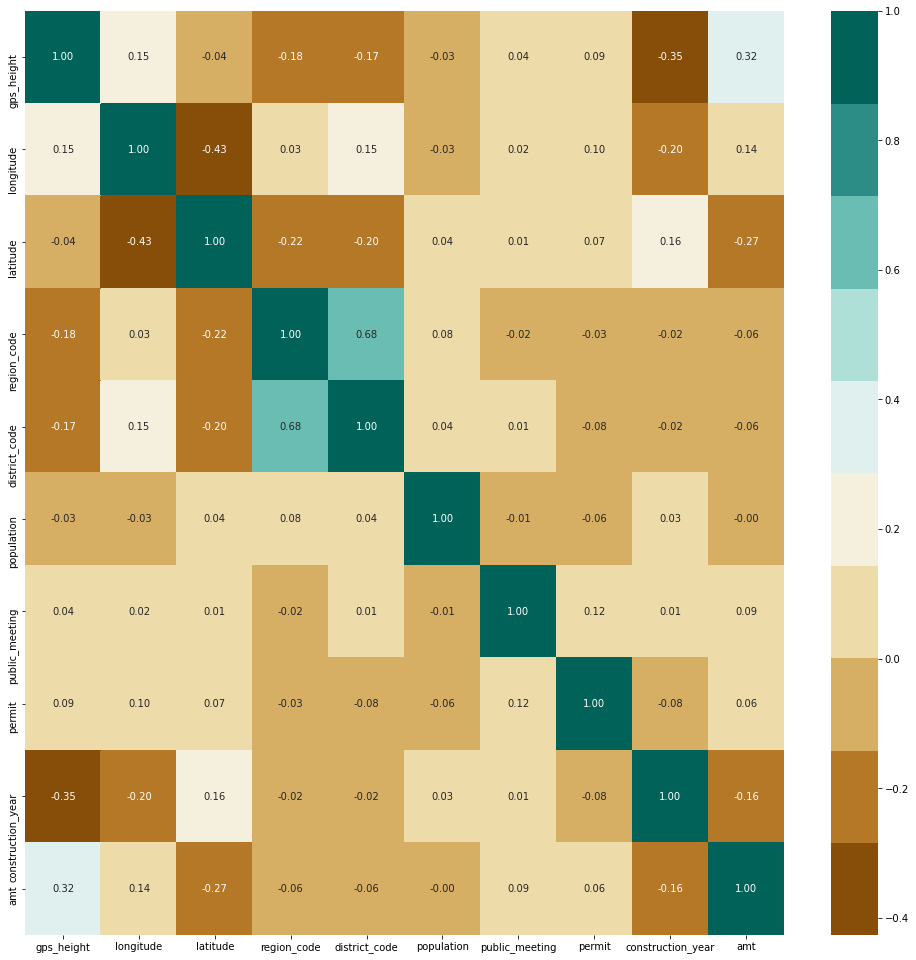

In [86]:
corr_matrix = combined.corr()
# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(17, 17))
colormap = sns.color_palette("BrBG", 10)
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")
plt.show()

In [74]:
df_region = df.loc[:, ['region', 'region_code']]

In [75]:
df_region.value_counts()

region         region_code
Iringa         11             6599
Shinyanga      17             6262
Mbeya          12             5758
Kilimanjaro    3              5494
Morogoro       5              5038
Kagera         18             4174
Mwanza         19             3824
Arusha         2              3709
Kigoma         16             3533
Ruvuma         10             3306
Tanga          4              3145
Dodoma         1              2779
Singida        13             2536
Tabora         14             2466
Mara           20             2451
Rukwa          15             2242
Pwani          6              2032
Manyara        21             1972
Lindi          80             1536
Pwani          60             1298
Mtwara         90             1133
Dar es Salaam  7              1020
Mtwara         99              512
               9               499
Arusha         24              402
Lindi          8               375
Mwanza         17               72
Tanga          5            

In [76]:
df['region'].value_counts().nunique()

21

In [77]:
df['region_code'].value_counts().nunique()

27

In [78]:
df.head()

,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,amt
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109.0,True,VWC,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,8.699681
8776,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280.0,True,Other,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0.000000
34310,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250.0,True,VWC,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,3.258097
67743,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58.0,True,VWC,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0.000000
19728,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,283.0,True,VWC,True,2010.0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0.000000


#**Feature Selection**

In [79]:
def make_mi_scores(X, y):
    X_mi = X.copy()
    y_mi = y.copy()
    for colname in X_mi.select_dtypes(["object", "category"]):
        X_mi[colname], _ = X_mi[colname].factorize()

    X_mi = X_mi.fillna(-1)
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X_mi.dtypes]
    
    mi_scores = mutual_info_classif(X_mi, y_mi, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_mi.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [ ]:
features_df.dtypes

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


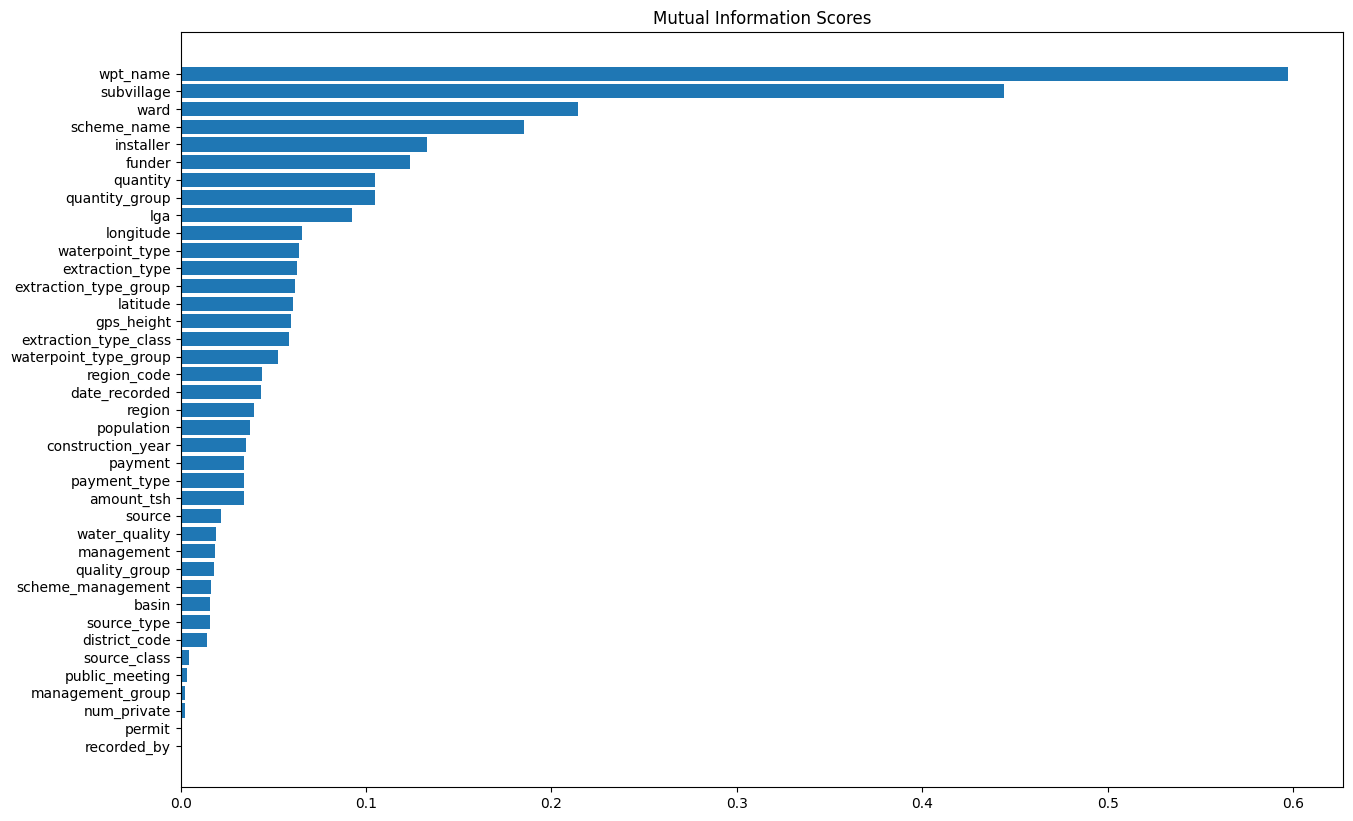

In [81]:
mi_scores = make_mi_scores(features_df, labels_df)
plt.figure(dpi=100, figsize=(15, 10))
plot_mi_scores(mi_scores.head(40))

In [82]:
X_sel = features_df.copy()
y_sel = labels_df.copy()

for colname in X_sel:
        X_sel[colname], _ = X_sel[colname].factorize()

X_sel = X_sel.fillna(-1)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
Features [18] are constant.
invalid value encountered in true_divide


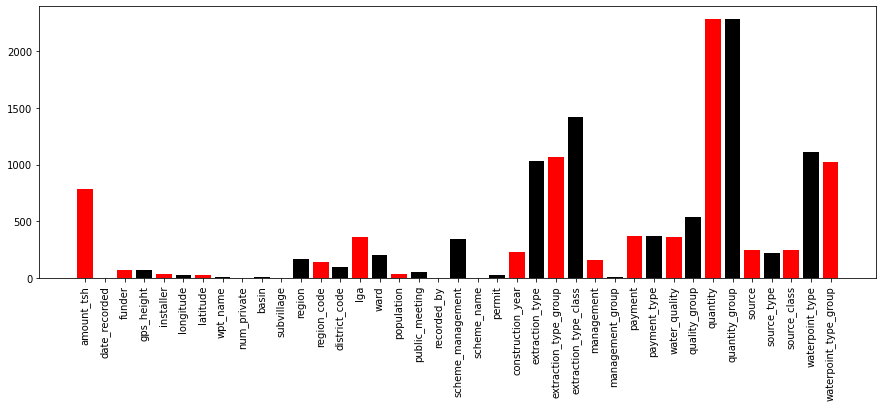

In [85]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit_transform(X=X_sel, y=y_sel)
cols = X_sel.columns[fs.get_support(indices=True)].tolist()
# plot the scores
plt.subplots(figsize=(15, 5))
pyplot.bar(cols, fs.scores_, color=['red', 'black'])
plt.xticks(rotation = 90)
pyplot.show()

#**Data Preprocessing**

In [87]:
#date time
df.date_recorded = pd.to_datetime(df.date_recorded)

In [88]:
df['year'] = df['date_recorded'].dt.year
df['month'] = df['date_recorded'].dt.month
df['day_of_months'] = df['date_recorded'].dt.day

In [89]:
df.drop(columns=['date_recorded'], axis=1, inplace=True)

In [90]:
# Extraction
df["Extraction_all"] = df["extraction_type"] + df["extraction_type_group"] + df["extraction_type_class"]

#management
df["Management_all"] = df["management"] + df["management_group"]

#Payment
df["Payment_all"] = df["payment"] + df["payment_type"]

#quality
df["Quality_all"] = df["water_quality"] + df["quality_group"]

#Quantitiy
df["Quantity_all"] = df["quantity"] + df["quantity_group"]

#Source
df["Source_all"] = df["source"] + df["source_type"]

#waterpoint_type
df["Waterpoint_all"] = df["waterpoint_type"] + df["waterpoint_type_group"]

In [91]:
#drop unwanted columns
df.drop(columns=['extraction_type','extraction_type_group','extraction_type_class','management','management_group','payment','payment_type','water_quality','quality_group','quantity','quantity_group','source','source_type','waterpoint_type','waterpoint_type_group'], axis=1, inplace=True)

**Normalization**

In [92]:
#Min Max Normalization
def normalize_minmax(df,columns):
    result = df.copy()
    for feature_name in columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [93]:
df=normalize_minmax(df,['amt'])

In [94]:
#mean normalization
def normalize_mean(df,columns):
    result = df.copy()
    for feature_name in columns:
        mean_value = df[feature_name].mean()
        std_value = df[feature_name].std()
        result[feature_name] = (df[feature_name] - mean_value) / std_value
    return result

In [95]:
df=normalize_mean(df,['population'])

**Encoding**

In [96]:
#one hot encoding
def OneHot(df2,variable,top_x_labels):
  for label in top_x_labels:
    df2[variable+'_'+label] = np.where(df[variable]==label,1,0)
  return df2

columns=["basin", "scheme_management", "Management_all", "Payment_all","Quality_all","Quantity_all","Source_all","Waterpoint_all"]
for col in columns:
  top = [x for x in df[col].value_counts().sort_values(ascending=False).head(25).index]
  print(top)
  df = OneHot(df,col,top)

['Lake Victoria', 'Pangani', 'Rufiji', 'Internal', 'Lake Tanganyika', 'Wami / Ruvu', 'Lake Nyasa', 'Ruvuma / Southern Coast', 'Lake Rukwa']
['VWC', 'WUG', 'Water authority', 'WUA', 'Water Board', 'Parastatal', 'Company', 'Private operator', 'Other', 'SWC', 'Trust', 'None']
['vwcuser-group', 'wuguser-group', 'water boarduser-group', 'wuauser-group', 'private operatorcommercial', 'parastatalparastatal', 'water authoritycommercial', 'otherother', 'companycommercial', 'unknownunknown', 'other - schoolother', 'trustcommercial']
['never paynever pay', 'pay per bucketper bucket', 'pay monthlymonthly', 'unknownunknown', 'pay when scheme failson failure', 'pay annuallyannually', 'otherother']
['softgood', 'saltysalty', 'unknownunknown', 'milkymilky', 'colouredcolored', 'salty abandonedsalty', 'fluoridefluoride', 'fluoride abandonedfluoride']
['enoughenough', 'insufficientinsufficient', 'drydry', 'seasonalseasonal', 'unknownunknown']
['springspring', 'shallow wellshallow well', 'machine dbhboreh

In [ ]:
for i in df.keys():
  i.replace('-', '_').replace('/', '_')
  print(i)

In [102]:
df.drop(columns=["basin", "scheme_management", "Management_all", "Payment_all","Quality_all","Quantity_all","Source_all","Waterpoint_all"], axis=1, inplace=True)

In [103]:
#ordinal encoding
map = {
    False: 0,
    True: 1
  }

df['public_meeting'] = df['public_meeting'].map(map)

In [104]:
#ordinal encoding
map = {
    False: 0,
    True: 1
  }

df['permit'] = df['permit'].map(map)

In [ ]:
#binary encoder
#use if count of unique values is more than 15
 
enc = ce.BinaryEncoder(cols=['funder','installer', 'subvillage', 'region','lga','ward','Extraction_all']).fit(df)
df = enc.transform(df)

In [106]:
combined2 = X.copy()
combined2['status_group'] = y['status_group']

In [107]:
#Label Encoding
combined2['status_group'] = LabelEncoder().fit_transform(combined2['status_group'])

In [108]:
encoder = TargetEncoder()
combined2['source_class_encoded'] = encoder.fit_transform(combined2['source_class'], combined2['status_group'])

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [109]:
combined2.loc[:,['source_class','source_class_encoded']].value_counts()

source_class  source_class_encoded
groundwater   0.855505                45794
surface       0.791792                13328
unknown       0.845324                  278
dtype: int64

In [110]:
#ordinal encoding
map = {
    'unknown': 0.845324,
    'surface': 0.791792,
    'groundwater': 0.855505
  }

df['source_class'] = df['source_class'].map(map)

In [ ]:
df.head()

In [112]:
Y_copy = y.copy() 

In [113]:
#Label Encoding
Y_copy['status_group'] = LabelEncoder().fit_transform(Y_copy['status_group'])

In [ ]:
Y_copy.head()

In [ ]:
df.select_dtypes(include='O').keys()

#**Separate training and test set**

In [116]:
X = df[:len(features_df)]
X_test = df[len(features_df):]

In [ ]:
X.head()

In [ ]:
X_test.head()

In [119]:
X.shape

(59400, 159)

In [120]:
X_test.shape

(14850, 159)

#**Principle Components Analysis (PCA)**

In [121]:
df_copy = df.copy()

In [122]:
y.head()

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


In [123]:
pca = PCA(n_components=2)
# X_pca = pca.fit_transform(df_copy)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, Y_copy], axis = 1)
PCA_df.head()

,PC1,PC2,status_group
0,721.718566,-0.525068,2.0
1,730.616171,4.832147,0.0
2,17.641709,4.454255,0.0
3,-405.664696,91.290253,0.0
4,-668.336197,-3.674263,2.0


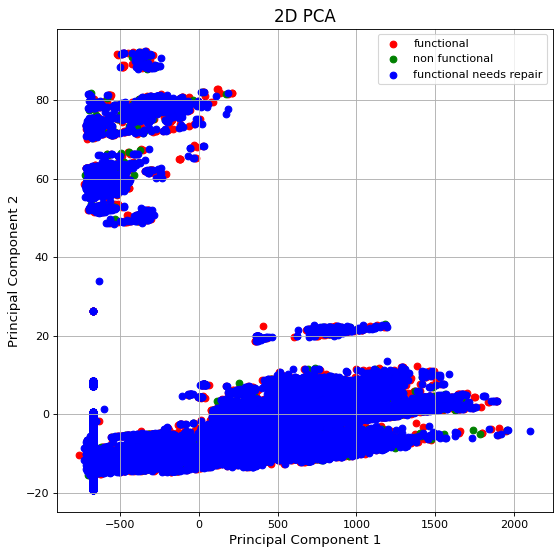

In [124]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [2, 1, 0]
colors = ['r', 'g', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['status_group'] == clas, 'PC1'], 
                PCA_df.loc[PCA_df['status_group'] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['functional', 'non functional','functional needs repair'])
plt.grid()

In [125]:
pca = PCA(n_components=2,svd_solver='full')
X_pca = pca.fit_transform(df_copy)
print(pca.explained_variance_)

[4.79950364e+05 3.47497364e+02]


In [126]:
#pca.explained_variance_ratio_
print ( "Components = ", pca.n_components , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

Components =  2 ;
Total explained variance =  0.99934


In [127]:
pca = PCA(n_components=2,svd_solver='full')
X_pca = pca.fit_transform(X)
print(pca.explained_variance_)

[4.80442989e+05 3.49814471e+02]


#**Model Training**

In [128]:
def score_dataset(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
    # Metric is Accuracy
    score = cross_val_score(
        model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    print('Accuracy: %.3f (%.3f)' % (mean(score), std(score)))

In [129]:
modelRF = RandomForestClassifier(n_estimators=400, random_state=0,max_depth=20)
modelETC = ExtraTreesClassifier(n_estimators=1000,min_samples_split=10)
modelXGB = XGBClassifier()
modelCAT = CatBoostClassifier(max_ctr_complexity=5, task_type='CPU', iterations=10000,
                   eval_metric='AUC', od_type='Iter', od_wait=500, loss_function = 'MultiClass', random_seed=1, depth=10, learning_rate = 0.03, l2_leaf_reg = 1)
modelMLP = MLPClassifier()
modelSVM = SVC(kernel='linear', C=1,gamma='auto')

In [ ]:
# score model
scoreRF = score_dataset(X,y,modelRF)

Accuracy: 0.816 (0.005)


In [ ]:
# score model
scoreXGB = score_dataset(X,y,modelXGB)

Accuracy: 0.745 (0.004)


In [ ]:
# score model
scoreETC = score_dataset(X,y,modelETC)

Accuracy: 0.812 (0.004)


#**Hyperparameter Tunning**

In [ ]:
def grid_search(model, params, X_tune, y_tune):
  clf =  GridSearchCV(model, params, cv=5, scoring='accuracy')
  clf.fit(X_tune, y_tune)
  return clf.best_score_, clf.best_params_

In [ ]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [50,100,200,400],
            'max_depth': [5, 10, 20, 100]
        }
    },
    'xg_boost': {
        'model': XGBClassifier(),
        'params' : {
            'eta': [0.01, 0.1, 0.2, 0.4],
            'max_depth': [5, 10, 15, 20, 22, 100]
        }
    },
    'cat_boost': {
        'model': CatBoostClassifier(loss_function = 'MultiClass', iterations=1000),
        'params' : {
            'learning_rate': [0.03, 0.1],
            'depth':[4, 6, 10],
            'l2_leaf_reg': [1, 3, 5, 7, 9]
        }
    }
}

In [ ]:
X_tune=X
y_tune = y.status_group

In [ ]:
best_score, best_params = grid_search(model_params['random_forest']['model'], model_params['random_forest']['params'], X_tune, y_tune)
print(best_score, best_params)

0.8132491582491583 {'max_depth': 20, 'n_estimators': 400}


In [ ]:
best_score, best_params = grid_search(model_params['xg_boost']['model'], model_params['xg_boost']['params'], X_tune, y_tune)
print(best_score, best_params)

In [ ]:
best_score, best_params = grid_search(model_params['cat_boost']['model'], model_params['cat_boost']['params'], X_tune, y_tune)
print(best_score, best_params)

#**Ensembling**

In [148]:
estimators_stacked = [
              #('xbg', modelXGB),
              # ('mlp', modelMLP),
              ('xt', modelETC),
              ('rn', modelRF)
              #('cat', modelCAT),
              
             ]

# Stacking Classifier
stacked_estimator =  StackingClassifier(estimators=estimators_stacked,
                                    final_estimator=LogisticRegression()  
                                  )
# Voting Classifier
voting_estimator = VotingClassifier(estimators=estimators_stacked, 
                        voting='hard')  # hard if labels needed, soft if probabilites needed

In [ ]:
# score model
scoreEns = score_dataset(X,y,stacked_estimator)

#**Train on entire dataset**

In [130]:
model = modelRF
X_train = X
y_train = y

model.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [149]:
modelEns = stacked_estimator
X_train = X
y_train = y

modelEns.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


StackingClassifier(cv=None,
                   estimators=[('xt',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=10,
                                                     min_we

#**Predict**

In [131]:
predict=model.predict(X_test)

In [150]:
predict=modelEns.predict(X_test)

#**Feature Importance**

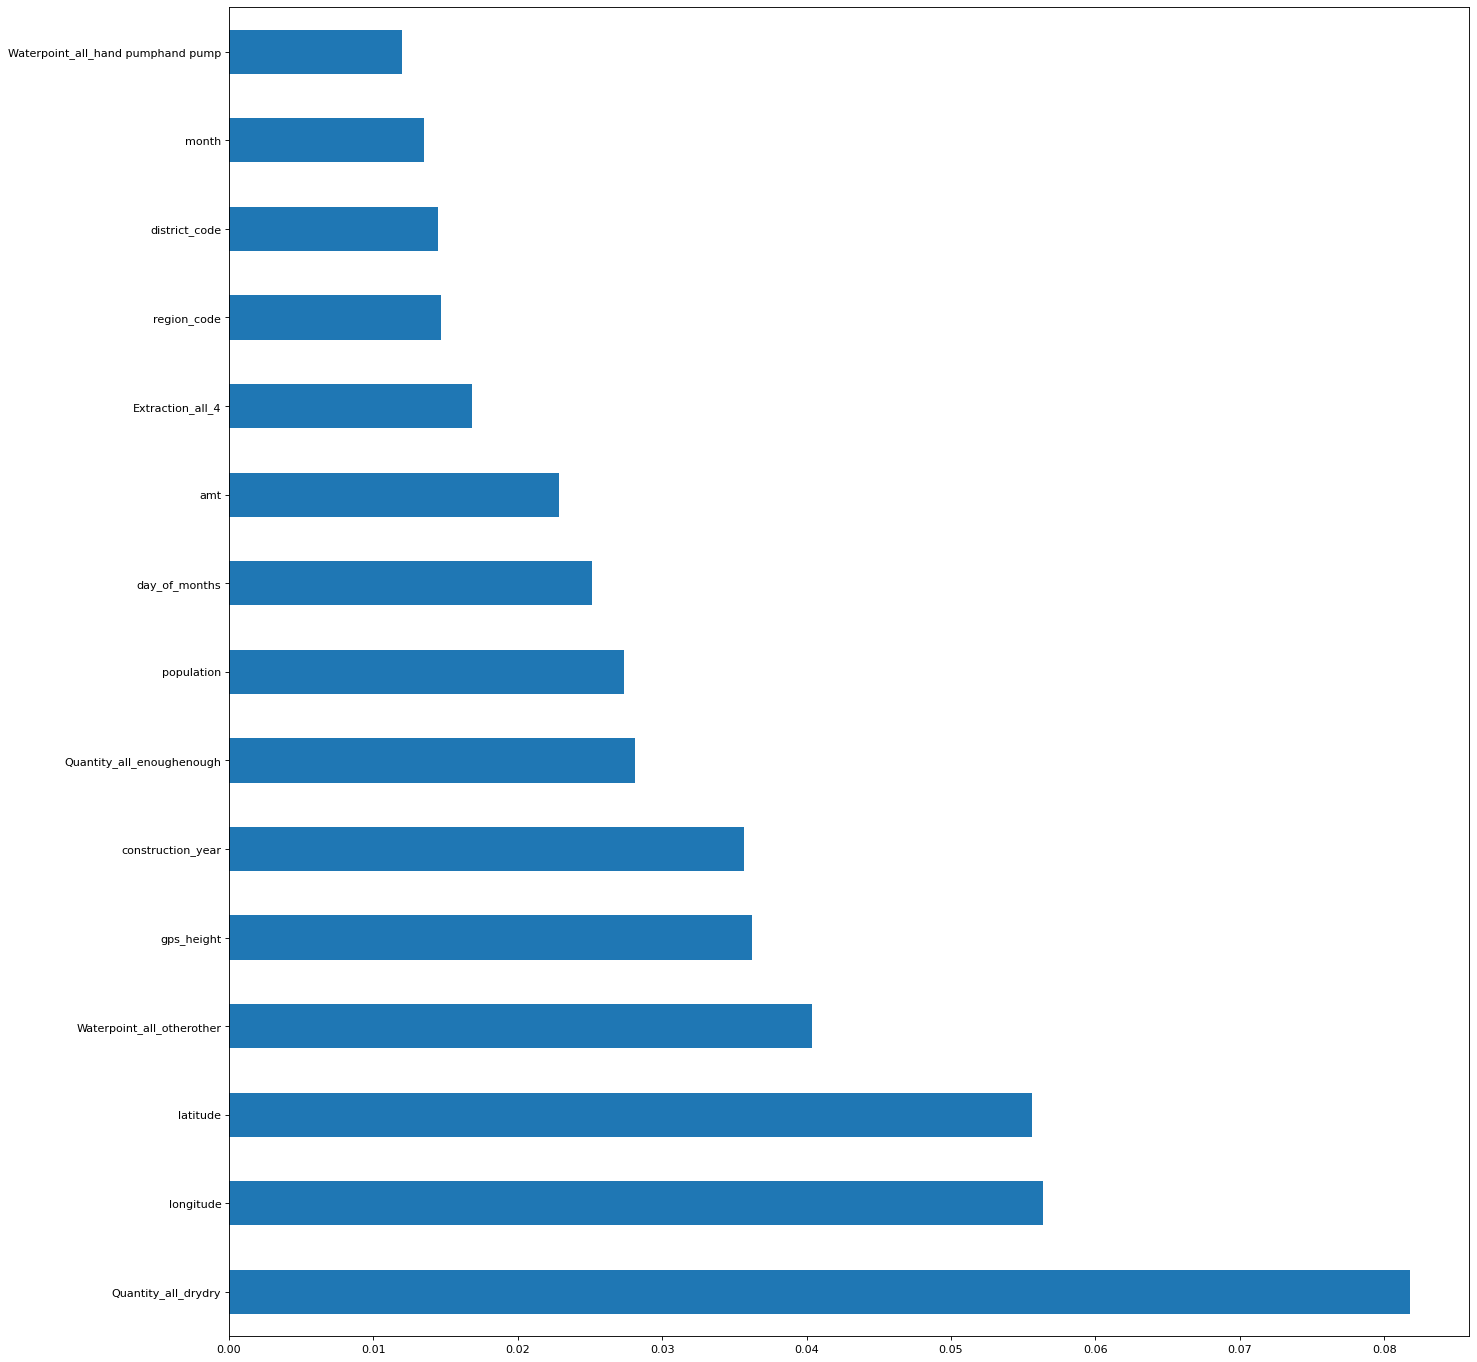

In [132]:
figure(num=None, figsize=(20, 22), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(modelRF.feature_importances_, index= X.columns)
feat_importances.nlargest(15).plot(kind='barh')

#**SHapley Additive exPlanations (SHAP)**

In [134]:
print(model.feature_importances_)

[0.00000000e+00 0.00000000e+00 1.21360835e-03 1.81659598e-03
 3.07975663e-03 4.05049153e-03 4.39231747e-03 4.57572681e-03
 5.55319497e-03 5.76426874e-03 5.17982225e-03 5.46465388e-03
 5.36921007e-03 3.62285453e-02 0.00000000e+00 9.31498984e-05
 1.41260933e-03 2.34067931e-03 2.82022045e-03 3.62264480e-03
 3.96013439e-03 4.45799981e-03 4.65245156e-03 5.11362592e-03
 4.84600400e-03 5.94516645e-03 5.03161398e-03 5.63881538e-02
 5.55903659e-02 0.00000000e+00 2.73389973e-03 5.96770434e-03
 6.35919369e-03 6.67729364e-03 6.88836137e-03 6.97595684e-03
 7.02390300e-03 7.08024134e-03 7.10311285e-03 6.89464813e-03
 7.00262460e-03 6.98973704e-03 7.03226685e-03 7.11814284e-03
 7.06301178e-03 0.00000000e+00 3.02800634e-03 4.32490669e-03
 4.40614239e-03 4.22627957e-03 5.48948360e-03 1.47064806e-02
 1.44639296e-02 0.00000000e+00 4.99360834e-03 4.61093785e-03
 5.25046327e-03 4.80534220e-03 5.22448832e-03 5.34160366e-03
 4.48392142e-03 0.00000000e+00 1.73631833e-04 5.18590875e-03
 5.65470692e-03 5.891218

In [135]:
explainer = shap.TreeExplainer(model)

In [136]:
# Get positive sample from training set
positive_sample = X_train.iloc[0]
positive_class = y_train.iloc[0]

# Get negative sample from training set
negative_sample = X_train.iloc[3]
negative_class = y_train.iloc[3]

In [137]:
# Get Shapley values for the positive sample
shap_values_positive = explainer.shap_values(positive_sample)

# Get Shapley values for the negative sample
shap_values_negative = explainer.shap_values(negative_sample)

In [138]:
print(f"{shap_values_positive[1]}")

print(f"{shap_values_negative[1]}")

[ 0.00000000e+00  0.00000000e+00 -1.50742508e-04 -1.46589014e-05
 -1.10532656e-04  8.06381992e-05  2.89479751e-04  1.51602064e-04
 -3.24521033e-04  6.22743721e-04 -4.53794292e-04 -6.51535872e-05
  8.61939081e-04 -5.27648740e-05  0.00000000e+00 -1.58627074e-06
 -1.70669048e-05  9.28253064e-06 -6.07611462e-05  7.39242941e-05
  1.24014563e-04  1.59320859e-04 -5.65448909e-04 -8.16143739e-05
  7.91089602e-05  1.65006116e-03  5.28860071e-04 -5.70128159e-03
 -2.72981524e-03  0.00000000e+00 -1.13531264e-04 -1.41379499e-03
  1.22607639e-04  8.15602487e-06  1.27667652e-04 -1.12870759e-03
 -1.06544461e-04 -7.11850443e-04 -2.88276814e-05  2.15093813e-04
 -4.86743179e-04  5.38616595e-04 -1.34956782e-04  1.25444238e-04
  1.72390719e-04  0.00000000e+00 -3.98715776e-04 -1.02473564e-03
 -4.53655506e-03 -1.66861483e-03 -4.75299979e-03 -6.92465081e-03
 -2.26110931e-03  0.00000000e+00 -8.18575418e-04 -3.58134160e-05
 -4.13225654e-04  4.20122971e-04 -6.54722910e-04 -1.17269414e-03
  6.60429973e-04  0.00000

In [139]:
shap.initjs()

# Plot for positive sample
shap.force_plot(explainer.expected_value[1], shap_values_positive[1], positive_sample)

# Plot for negative sample
shap.force_plot(explainer.expected_value[1], shap_values_negative[1], negative_sample)

In [140]:
x_set = X_train.iloc[0:20]

In [141]:
shap_values = explainer.shap_values(x_set)

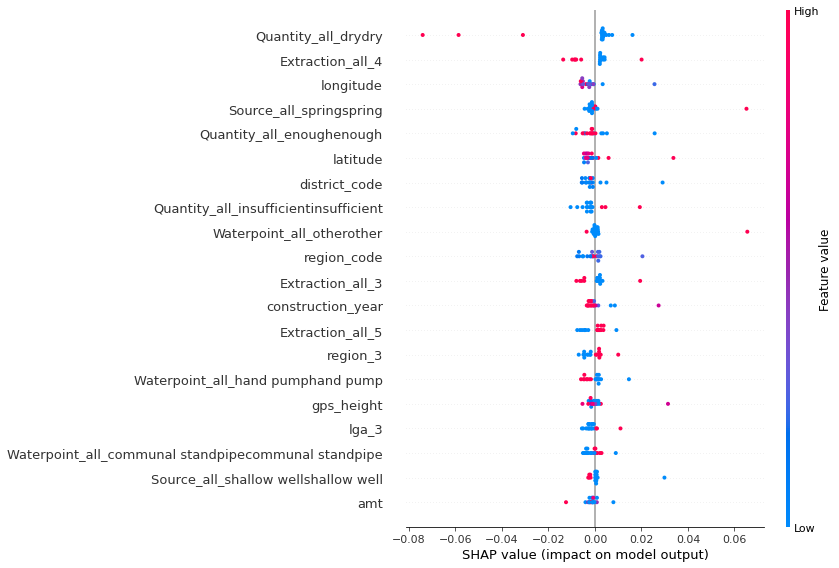

In [142]:
shap.summary_plot(shap_values[1], x_set)

#**Partial Dependency Plots**

In [ ]:
import dalex as dx
rf_exp = dx.Explainer(modelRF, X, y, 
                  label = "PumpItUp RF Pipeline")

Preparation of a new explainer is initiated

  -> data              : 59400 rows 159 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 59400 values
  -> target variable   : Please note that 'y' is a string array.
  -> target variable   : 'y' should be a numeric or boolean array.
  -> target variable   : Otherwise an Error may occur in calculating residuals or loss.
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : PumpItUp RF Pipeline
  -> predict function  : <function yhat_proba_default at 0x7f2eafdc15f0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.0733, max = 0.996
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         :  'residual_function' returns an Error when execut

In [ ]:
pd_rf = rf_exp.model_profile(variables = ['gps_height', 'longitude','latitude','construction_year','population','amt'])
pd_rf.result

Calculating ceteris paribus: 100%|██████████| 6/6 [00:11<00:00,  1.90s/it]


,_vname_,_label_,_x_,_yhat_,_ids_
0,gps_height,PumpItUp RF Pipeline,-90.00,0.075437,0
1,gps_height,PumpItUp RF Pipeline,-61.40,0.075437,0
2,gps_height,PumpItUp RF Pipeline,-32.80,0.075074,0
3,gps_height,PumpItUp RF Pipeline,-4.20,0.074419,0
4,gps_height,PumpItUp RF Pipeline,24.40,0.074113,0
...,...,...,...,...,...
601,amt,PumpItUp RF Pipeline,0.96,0.073985,0
602,amt,PumpItUp RF Pipeline,0.97,0.073985,0
603,amt,PumpItUp RF Pipeline,0.98,0.073985,0
604,amt,PumpItUp RF Pipeline,0.99,0.073985,0


In [ ]:
pd_rf.plot()

#**Submission**

In [151]:
submission_df = pd.read_csv("SubmissionFormat.csv", 
                            index_col="id")

In [152]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_df.index.values, 
                              submission_df.index.values)

# Save predictions to submission data frame
submission_df["status_group"] = predict

In [153]:
submission_df.to_csv('my_submission.csv', index=True)

In [154]:
from google.colab import files
files.download('my_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>